## Exploratory Data Analysis
Popular words, vocab size,...

In [1]:
import pandas as pd
dtm = pd.read_pickle("dtm.pkl")
dtm = dtm.transpose()
dtm.head()

Building Nothing Out Of Something  \
abandoned                                   0   
able                                        0   
abrupt                                      0   
absence                                     0   
absolutely                                  0   

            Everywhere And His Nasty Parlour Tricks  \
abandoned                                         0   
able                                              0   
abrupt                                            0   
absence                                           0   
absolutely                                        0   

            Good News For People Who Love Bad News  \
abandoned                                        0   
able                                             0   
abrupt                                           0   
absence                                          0   
absolutely                                       0   

            No One's First And You're Next  Sad Sappy Sucker  \
abandoned                                0                 0   
able                                     0                 0   
abrupt                                   0                 0   
absence                                  0                 0   
absolutely                               0                 0   

            Strangers To Ourselves  The Fruit That Ate Itself  \
abandoned                        1                          0   
able                             1                          0   
abrupt                           0                          0   
absence                          0                          0   
absolutely                       0                          0   

            The Lonesome Crowded West  The Moon & Antarctica  \
abandoned                           0                      0   
able                                0                      0   
abrupt                              0                      0   
absence                             3                      0   
absolutely                          0                      0   

            This Is A Long Drive For Someone With Nothing To Think About  \
abandoned                                                   0              
able                                                        0              
abrupt                                                      1              
absence                                                     1              
absolutely                                                  0              

            We Were Dead Before The Ship Even Sank  
abandoned                                        0  
able                                             0  
abrupt                                           0  
absence                                          0  
absolutely                                       1

Find top words for each album

In [2]:
top = {}
for c in dtm.columns:
    top_col = dtm[c].sort_values(ascending=False).head(15)
    top[c] = list(zip(top_col.index, top_col.values))

# pretty print
for album, top_words in top.items():
    print(album)
    print(", ".join([word for word, count in top_words]))
    print("=======")

Building Nothing Out Of Something
im, told, oh, ya, said, really, youre, long, car, aint, know, dont, cause, uh, road
Everywhere And His Nasty Parlour Tricks
huhuh, thats, youre, alright, oh, came, theres, know, make, dont, comes, im, blood, short, told
Good News For People Who Love Bad News
im, just, dance, know, good, gonna, times, day, float, dont, got, killing, hall, box, right
No One's First And You're Next
way, just, know, sleeping, wont, like, lucky, dont, got, water, deep, oh, say, scout, knew
Sad Sappy Sucker
oh, youre, bababababa, pingpong, im, got, car, dont, uh, know, em, time, wont, ive, spilled
Strangers To Ourselves
oh, dont, know, just, ride, brave, lets, really, day, im, say, time, going, lay, wait
The Fruit That Ate Itself
dirty, got, dance, fingernails, oh, uh, muffin, youre, fall, went, want, plan, make, payment, just
The Lonesome Crowded West
nice, im, know, long, yeah, oh, youre, come, bleed, like, dont, hang, drunk, way, distance
The Moon & Antarctica
like, right

A lot of "im" and so on. Needs to be cleaned.

In [3]:
from collections import Counter

# count most popular words
words = []
for album in dtm.columns:
    top_w = [word for (word, count) in top[album]]
    for t in top_w:
        words.append(t)
        
# words

How many albums have this word in the top words.

In [4]:
Counter(words).most_common()

[('know', 10),
 ('dont', 10),
 ('im', 9),
 ('oh', 9),
 ('just', 7),
 ('got', 7),
 ('youre', 6),
 ('like', 5),
 ('really', 3),
 ('long', 3),
 ('uh', 3),
 ('right', 3),
 ('time', 3),
 ('told', 2),
 ('said', 2),
 ('car', 2),
 ('thats', 2),
 ('came', 2),
 ('make', 2),
 ('dance', 2),
 ('gonna', 2),
 ('day', 2),
 ('way', 2),
 ('wont', 2),
 ('say', 2),
 ('yeah', 2),
 ('let', 2),
 ('ya', 1),
 ('aint', 1),
 ('cause', 1),
 ('road', 1),
 ('huhuh', 1),
 ('alright', 1),
 ('theres', 1),
 ('comes', 1),
 ('blood', 1),
 ('short', 1),
 ('good', 1),
 ('times', 1),
 ('float', 1),
 ('killing', 1),
 ('hall', 1),
 ('box', 1),
 ('sleeping', 1),
 ('lucky', 1),
 ('water', 1),
 ('deep', 1),
 ('scout', 1),
 ('knew', 1),
 ('bababababa', 1),
 ('pingpong', 1),
 ('em', 1),
 ('ive', 1),
 ('spilled', 1),
 ('ride', 1),
 ('brave', 1),
 ('lets', 1),
 ('going', 1),
 ('lay', 1),
 ('wait', 1),
 ('dirty', 1),
 ('fingernails', 1),
 ('muffin', 1),
 ('fall', 1),
 ('went', 1),
 ('want', 1),
 ('plan', 1),
 ('payment', 1),
 ('nice'

Remove that are in top for at least 5 albums.

In [5]:
new_stops = [word for word, count in Counter(words).most_common() if count >= 5]
print(new_stops)

['know', 'dont', 'im', 'oh', 'just', 'got', 'youre', 'like']


Update DTM

In [6]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pickle

corpus = pd.read_pickle("corpus.pkl")
stop_words = text.ENGLISH_STOP_WORDS.union(new_stops)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus.lyrics)

# this is a new dtm
dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
dtm.index = corpus.index
dtm.to_pickle("dtm_stop.pkl")
pickle.dump(cv, open("cv_stop.pkl", "wb"))
dtm = dtm.transpose()
dtm

Building Nothing Out Of Something  \
abandoned                                                    0   
able                                                         0   
abrupt                                                       0   
absence                                                      0   
absolutely                                                   0   
...                                                        ...   
youll                                                        2   
young                                                        0   
youve                                                        0   
yow                                                          0   
zipzipzipzipzipzipzipzipzip                                  0   

                             Everywhere And His Nasty Parlour Tricks  \
abandoned                                                          0   
able                                                               0   
abrupt                                                             0   
absence                                                            0   
absolutely                                                         0   
...                                                              ...   
youll                                                              6   
young                                                              0   
youve                                                              0   
yow                                                                0   
zipzipzipzipzipzipzipzipzip                                        0   

                             Good News For People Who Love Bad News  \
abandoned                                                         0   
able                                                              0   
abrupt                                                            0   
absence                                                           0   
absolutely                                                        0   
...                                                             ...   
youll                                                             1   
young                                                             0   
youve                                                             2   
yow                                                               0   
zipzipzipzipzipzipzipzipzip                                       0   

                             No One's First And You're Next  Sad Sappy Sucker  \
abandoned                                                 0                 0   
able                                                      0                 0   
abrupt                                                    0                 0   
absence                                                   0                 0   
absolutely                                                0                 0   
...                                                     ...               ...   
youll                                                     0                 4   
young                                                     0                 0   
youve                                                     1                 2   
yow                                                       0                 0   
zipzipzipzipzipzipzipzipzip                               0                 0   

                             Strangers To Ourselves  \
abandoned                                         1   
able                                              1   
abrupt                                            0   
absence                                           0   
absolutely                                        0   
...                                             ...   
youll                                             1   
young                                             1   
youve                                             

## Wordclouds

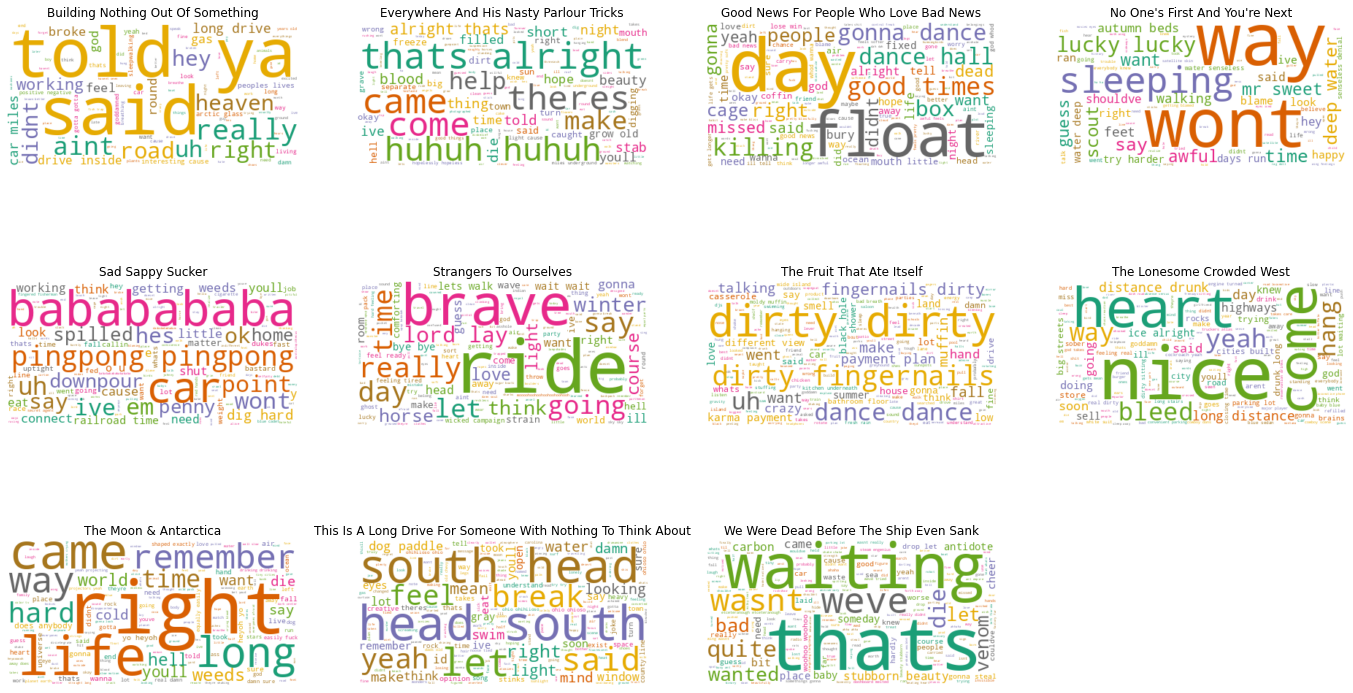

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
              max_font_size=100, random_state=42)

size = 1.5
plt.rcParams['figure.figsize'] = [16*size, 9*size]
# create subplots
for index, album in enumerate(dtm.columns):
    wc.generate(corpus.lyrics[album])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(album)
    
plt.show()

## Number of words

In [8]:
unique_list = []
for album in dtm.columns:
    uniques = dtm[album].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

words_df = pd.DataFrame(list(zip(dtm.columns, unique_list)), columns = ["album", "unique_words"])
words_df["date"] = [2000, 2001, 2004, 2009, 2001, 2015, 1997, 1997, 2000, 1996, 2007]
unique_sort = words_df.sort_values(by="unique_words", ascending=False)
unique_sort

album  unique_words  date
10             We Were Dead Before The Ship Even Sank           725  2007
5                              Strangers To Ourselves           700  2015
7                           The Lonesome Crowded West           574  1997
2              Good News For People Who Love Bad News           567  2004
9   This Is A Long Drive For Someone With Nothing ...           566  1996
8                               The Moon & Antarctica           495  2000
3                      No One's First And You're Next           434  2009
0                   Building Nothing Out Of Something           371  2000
4                                    Sad Sappy Sucker           335  2001
1             Everywhere And His Nasty Parlour Tricks           277  2001
6                           The Fruit That Ate Itself           256  1997

Find lexical density

$$\text{lexical density} = \frac{\text{unique words}}{\text{all words}}$$

In [9]:
totals_list = []
for album in dtm.columns:
    totals = sum(dtm[album])
    totals_list.append(totals)
    
density_list = []
for unique, total in zip(unique_list, totals_list):
    density_list.append(unique/total)
    
words_df['total_words'] = totals_list
words_df['density'] = density_list

density_sort = words_df.sort_values(by="density", ascending=False)
density_sort

album  unique_words  date  \
4                                    Sad Sappy Sucker           335  2001   
9   This Is A Long Drive For Someone With Nothing ...           566  1996   
3                      No One's First And You're Next           434  2009   
5                              Strangers To Ourselves           700  2015   
6                           The Fruit That Ate Itself           256  1997   
1             Everywhere And His Nasty Parlour Tricks           277  2001   
0                   Building Nothing Out Of Something           371  2000   
2              Good News For People Who Love Bad News           567  2004   
10             We Were Dead Before The Ship Even Sank           725  2007   
8                               The Moon & Antarctica           495  2000   
7                           The Lonesome Crowded West           574  1997   

    total_words   density  
4           623  0.537721  
9          1161  0.487511  
3           925  0.469189  
5          1640  0.426829  
6           625  0.409600  
1           678  0.408555  
0           948  0.391350  
2          1586  0.357503  
10         2057  0.352455  
8          1489  0.332438  
7          1937  0.296335

TF-IDF

In [10]:
import math
import numpy as np

In [11]:
def calc_tfidf_top_words(dtm):
    """
    Find a top tfidf word for each album.
    """
    n = dtm.shape[0]
    words_out = []
    # for each albums
    for album in dtm.index:
        # for each album
        tf_idf_list = []
        tfidf_max = 0
        argmax = 0
        top_word = ""
        i = 0
        for word in dtm.columns:
            # how many times does the word appear in the album
            tf = dtm[word][album]
            # in how many albums does appear
            non_zero_count = (dtm[word] != 0).sum()
            # idf using log
            idf = math.log(n/non_zero_count)
            # tfidf
            tfidf = tf*idf
            # argmax
            if tfidf > tfidf_max:
                argmax = i
                top_word = word
                tfidf_max = tfidf
            tf_idf_list.append(tf_idf_list)
            i += 1
            # print(f"{album}:\t\t {word.ljust(20)} tf: {tf}\t doc_count: {non_zero_count}\t idf: {idf}\t tfidf: {tfidf}")
            
        print(f"Album: {album.ljust(70)} top word: {top_word.ljust(15)} tfidf: {tfidf_max}")

In [12]:
calc_tfidf_top_words(dtm.transpose())

Album: Building Nothing Out Of Something                                      top word: ya              tfidf: 37.504458029245356
Album: Everywhere And His Nasty Parlour Tricks                                top word: huhuh           tfidf: 67.14106763835437
Album: Good News For People Who Love Bad News                                 top word: killing         tfidf: 57.549486547160896
Album: No One's First And You're Next                                         top word: sleeping        tfidf: 34.094961844768505
Album: Sad Sappy Sucker                                                       top word: bababababa      tfidf: 31.17263854637882
Album: Strangers To Ourselves                                                 top word: brave           tfidf: 64.743172365556
Album: The Fruit That Ate Itself                                              top word: dirty           tfidf: 42.876338476298606
Album: The Lonesome Crowded West                                              top word: nice   

Might require some more cleaning...

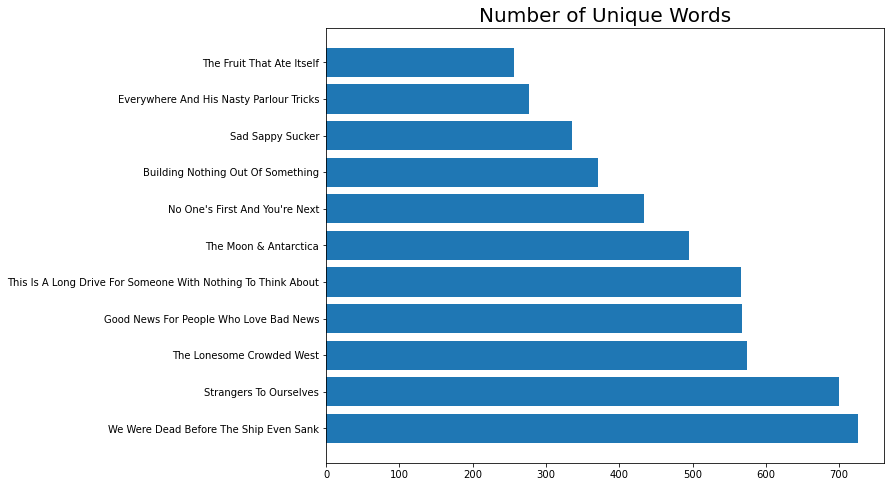

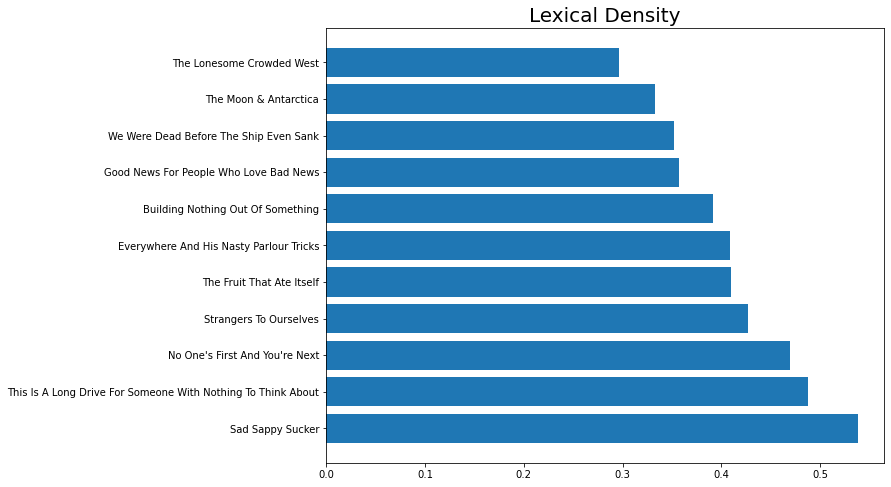

In [13]:
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]

y_pos = np.arange(len(words_df))
plt.barh(y_pos, unique_sort.unique_words, align='center')
plt.yticks(y_pos, unique_sort.album)
plt.title('Number of Unique Words', fontsize=20)
plt.show()

plt.barh(y_pos, density_sort.density, align='center')
plt.yticks(y_pos, density_sort.album)
plt.title('Lexical Density', fontsize=20)

plt.show()

<AxesSubplot:title={'center':'Lexical density vs number of unique words.'}, xlabel='unique_words', ylabel='density'>

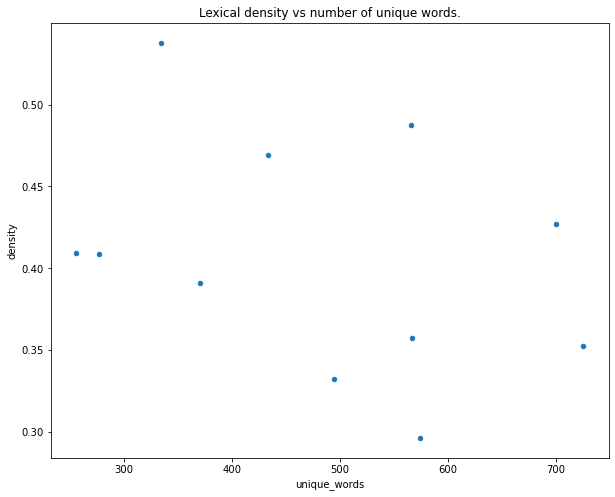

In [14]:
# scatter
plt.rcParams['figure.figsize'] = [10, 8]
words_df.plot.scatter("unique_words", "density", title="Lexical density vs number of unique words.")

There seems to be no relation.

<AxesSubplot:title={'center':'Lexical density over time.'}, xlabel='date', ylabel='density'>

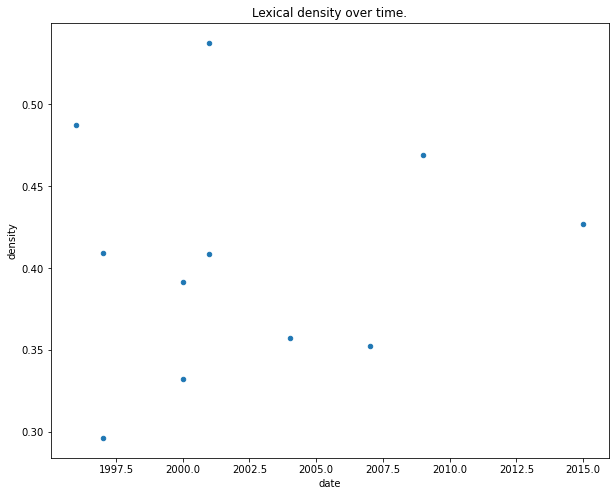

In [15]:
plt.rcParams['figure.figsize'] = [10, 8]
words_df.plot.scatter("date", "density", title="Lexical density over time.")

Maybe increasing. Would require a test.